# Challenge 1: E-commerce Sales Forecasting
- **Challenge**: Predict future sales for an e-commerce platform using historical sales data
- **Deliverables**: A Jupyter Notebook with data cleaning, exploratory data analysis, forecasting model(s), and a section on model evaluation. A short presentation with a focus on forecasting results and business insights.
- **Data Source**: UCI ML Repository's "Online Retail" dataset.

# 1. Obtain the Dataset
First, download the "Online Retail" dataset from the UCI Machine Learning Repository. Ensure the data is cleaned and preprocessed if necessary.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features

# duplicate the df to avoid the warning "A value is trying to be set on a copy of a slice from a DataFrame."
X = X.copy()
X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 2. Data Cleaning
Before we can use the data, we need to preprocess it. This typically involves handling missing values, encoding categorical variables, and creating the RFM features.

In [2]:
# Check the columns data types. Are they all correct?
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


In [3]:
# use "to_datetime" method of Pandas library to convert the field "InvoiceDate from "object" to "datetime".
# The resulting dataframe should have the same column names, so you have to just convert the column type
# Print again the dataframe columns data types to confirm that the action was performed
# Also print the first 10 records of the updated dataframe

import pandas as pd
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])
X.info()
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     541909 non-null  int64         
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   CustomerID   406829 non-null  float64       
 5   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 24.8+ MB


,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Data exploration: how many "Null" rows do we have? And Where?

# the next command is needed to display all columns, which otherwise may be truncated
pd.set_option('display.max_rows', None) 

X.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [5]:
# Handle missing values: drop rows with missing CustomerID
# After completing this step, run again the previous cell to check how many NaN we have

X.dropna(subset=['CustomerID'], inplace=True)
X.shape

(406829, 6)

# 3. Data Exploration
Here are some suggested metrics to visualize:
- Sales by Country: Visualize the total sales amount for each country using a table, then a bar chart and finally a world map.
- Monthly Sales Trend: Show the trend of monthly sales over time using a line chart or an area chart.
- Top Selling Products: Display the top-selling products based on the quantity sold using a horizontal bar chart.
- Revenue by Customer: Plot the revenue generated by each customer using a pie chart, for the top 10 customers.
- (*OPTIONAL*) Time Series Analysis: Analyze the seasonality and trends in sales data using techniques like moving averages, exponential smoothing, or decomposition plots.
- Purchase Frequency: Show the distribution of purchase frequency by plotting the number of purchases made by each customer using a histogram or a bar chart.
- Cart Abandonment Rate: Calculate the percentage of abandoned carts and visualize it using a pie chart or a donut chart.
- Customer Churn Rate: Calculate the percentage of customers who have not made any purchases in a specific time period and visualize it using a stacked bar chart or a line chart.

In [6]:
# Sales by Country: Visualize the total sales amount for each country through a simple table

# - Group the data by country and calculate the total sales amount
# - Display the result in a tabular view

sales_by_country = X.groupby('Country')['Quantity'].sum().sort_values(ascending=False) 
sales_by_country

Country
United Kingdom          4008533
Netherlands              200128
EIRE                     136329
Germany                  117448
France                   109848
Australia                 83653
Sweden                    35637
Switzerland               29778
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16044
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Israel                     3990
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1789
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


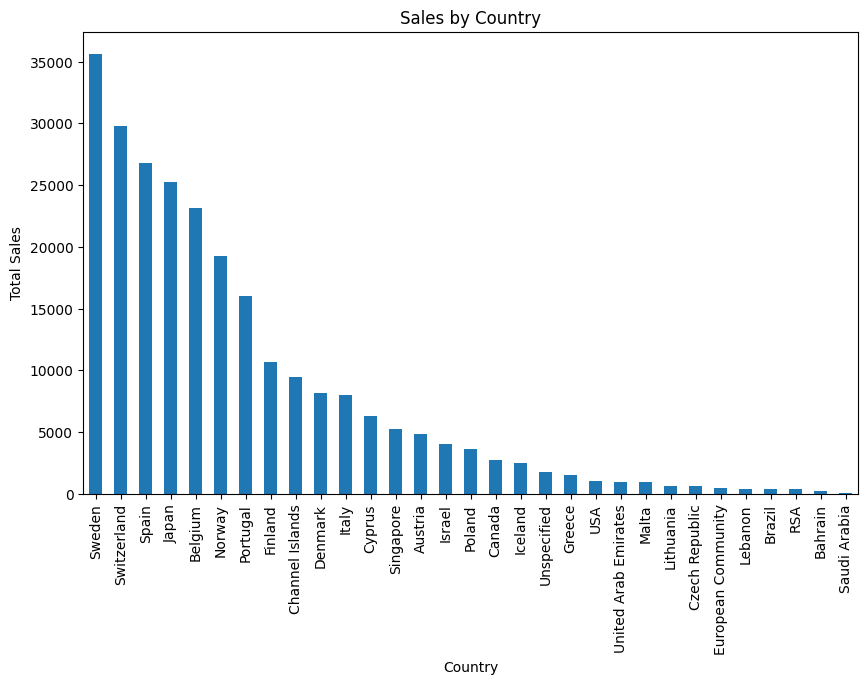

In [7]:
# Visualize the previous dataset with a bar chart
# However, do not start showing the first one, start from Sweden instead (6th country)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 6))  
sales_by_country[6:].plot(kind='bar')  
plt.xlabel('Country')  
plt.ylabel('Total Sales')  
plt.title('Sales by Country')  
plt.show()  

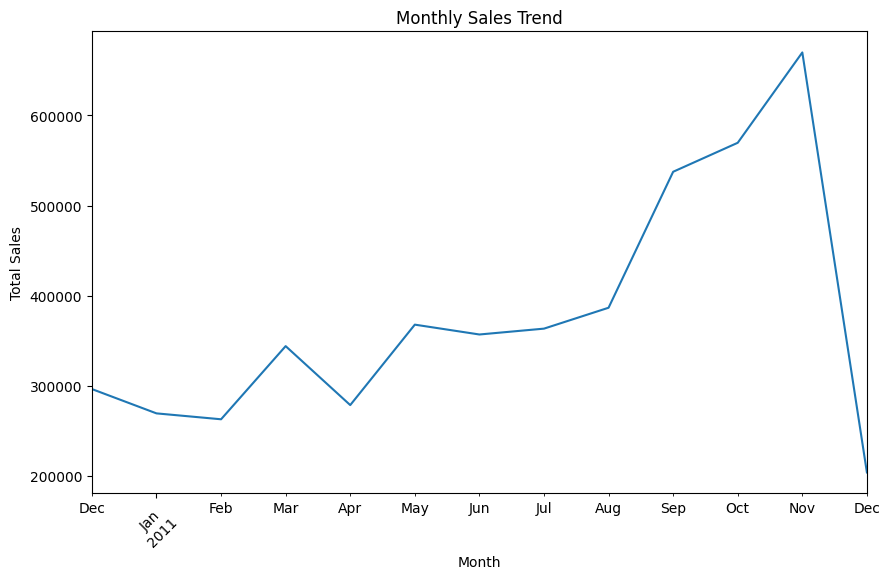

In [8]:
# Monthly Sales Trend: Show the trend of monthly sales over time using a line chart

# - Create a new column for the month and year:
X['Month'] = X['InvoiceDate'].dt.to_period('M')

# Group the data by month and calculate the total sales amount:
monthly_sales = X.groupby('Month')['Quantity'].sum()

# Plot the line chart or area chart:
plt.figure(figsize=(10, 6))  
monthly_sales.plot(kind='line')  # or monthly_sales.plot(kind='area')  
plt.xlabel('Month')  
plt.ylabel('Total Sales')  
plt.title('Monthly Sales Trend')  
plt.xticks(rotation=45)  
plt.show()  

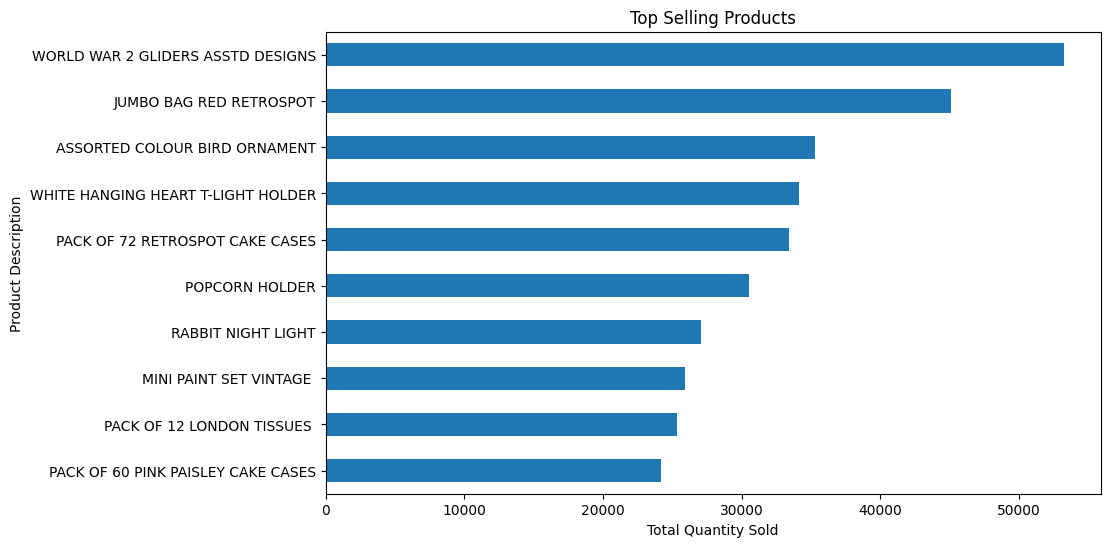

In [9]:
# Top Selling Products: Display the top-selling products based on the quantity sold using a horizontal bar chart.

# Group the data by product description and calculate the total quantity sold:
top_selling_products = X.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the horizontal bar chart:
plt.figure(figsize=(10, 6))  
top_selling_products.sort_values().plot(kind='barh')  
plt.xlabel('Total Quantity Sold')  
plt.ylabel('Product Description')  
plt.title('Top Selling Products')  
plt.show() 

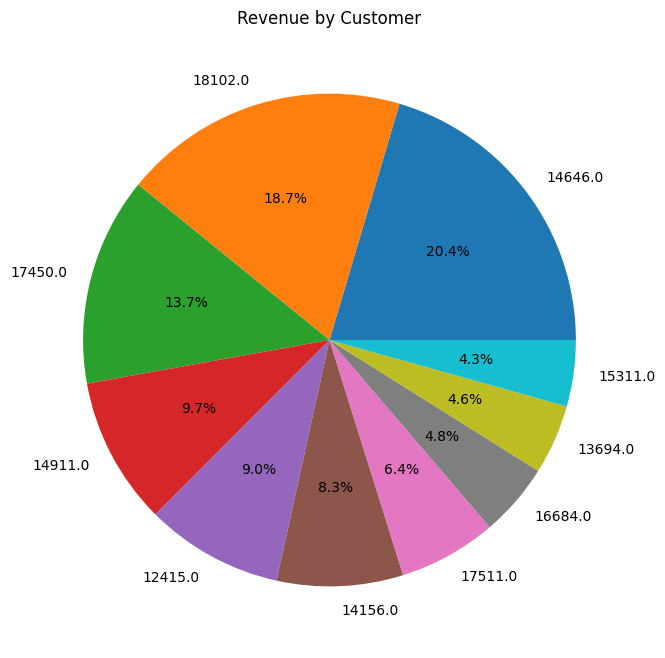

In [10]:
# Revenue by Customer: Plot the revenue generated by each customer using a pie chart.
# Choose only the top 10 customers

# Hints:
# - add the "Revenue" column to the dataframe as a calculated column (Quantity * UnitPrice)
X['Revenue'] = X['Quantity'] * X['UnitPrice']

# - calculate the sum of all "Revenues" per customer, and sort the result descending
revenue_by_customer = X.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

# - reduce the previous dataset to the TOP 10 elements by revenue
# - plot the pie chart
plt.figure(figsize=(8, 8))
revenue_by_customer.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue by Customer')
plt.ylabel('')
plt.show()

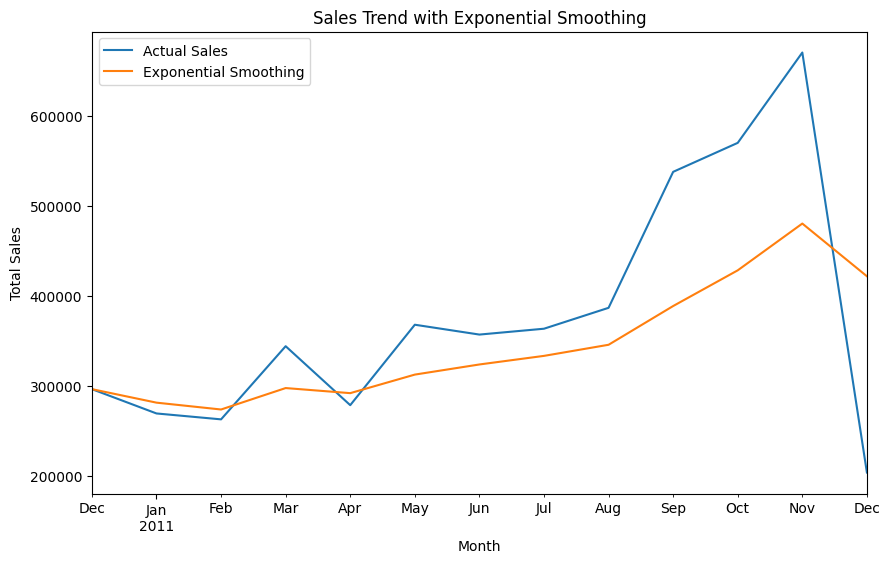

In [11]:
# (OPTIONAL)
# Time Series Analysis: Analyze the seasonality and trends in sales data using techniques 
# like moving averages, exponential smoothing, or decomposition plots.

# Does "InvoiceDate" have a datetime format? Otherwise, you need to convert it
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])
 
# Now that we have a datetime column, create a new one to host just year and month.
# Hint: leverage ".dt.to_period('M')", try calculating the Quarter too
X['Month'] = X['InvoiceDate'].dt.to_period('M')
 
# Now that we have the month, group the data by month and calculate the total sales amount:
monthly_sales = X.groupby('Month')['Quantity'].sum()  
 
# Apply exponential smoothing to the time series analysis technique:
# - recall to choose and appropriate window size
# - use the "rolling" method of the dataframe to calculate teh mean, while the "ewm(alpha=0.2)" for smoothed mean

window_size = 12  # Choose an appropriate window size  
moving_avg = monthly_sales.rolling(window_size).mean()
smoothed_sales = monthly_sales.ewm(alpha=0.2).mean()  
  
plt.figure(figsize=(10, 6))  
monthly_sales.plot(label='Actual Sales')  
smoothed_sales.plot(label='Exponential Smoothing')  
plt.xlabel('Month')  
plt.ylabel('Total Sales')  
plt.title('Sales Trend with Exponential Smoothing')  
plt.legend()  
plt.show()  

# 4. Data Preprocessing: Calculate RFM Features
RFM stands for Recency, Frequency, and Monetary value, and these three features are commonly used for customer segmentation. Each of these metrics represents a different aspect of a customer's buying behavior:
- **Recency (R)**: This metric indicates how recently a customer made a purchase. It is calculated by looking at the number of days since a customer's last purchase. The shorter the time, the more recent the purchase, suggesting that the customer is more likely to be responsive to new offers or promotions.
- **Frequency (F)**: This metric measures how often a customer makes a purchase within a specific time frame. A higher frequency indicates a customer shops more often, which is generally seen as a sign of customer loyalty.
- **Monetary Value (M)**: This metric represents the total amount of money a customer has spent over a period of time. Customers who spend more are often considered more valuable to the business.

By scoring each customer on these three aspects, businesses can segment their customer base into groups for targeted marketing campaigns, personalized promotions, and to improve customer retention strategies. For example, a group of customers with high RFM scores are likely to be the most profitable and loyal customers, and businesses might want to focus on retaining these customers.

In the context of the machine learning experiment with the "Online Retail" dataset, you would use these three RFM features to create customer segments using clustering algorithms. The idea is to group customers with similar RFM scores together to identify patterns and tailor strategies accordingly.

In [12]:
# Create TotalPrice column (unless it already exists)
# Hint: if you want to see the new dataframe, recall to limit the number of rows you show

X['TotalPrice'] = X['Quantity'] * X['UnitPrice']
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Revenue,TotalPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34,20.34


In [13]:
# Calculate RFM metrics into a table called "rfm_table"
# Note: there is an elegant method to calculate al the three metrics in a single instruction (leveraging groupby plus 
# the .agg() method, plus lambda expressions), however there are other more manual ways to get the same result.

# The objective here is to build a simple table with three columns representing the three KPI's (R-F-M)

# Hints: 
# - X.groupby('CustomerID').agg({'Description': lambda x: len(x)}) returns how many times each customer is in the dataframe
# - to calculate the number of days between a date and now, you can simply calculate (difference).days

from datetime import datetime
NOW = datetime.now()
  
rfm_table = X.groupby('CustomerID').agg({  
    'InvoiceDate': lambda x: (NOW - x.max()).days,  
    'Description': lambda x: len(x),  
    'TotalPrice': lambda x: x.sum()  
})  

rfm_table

,InvoiceDate,Description,TotalPrice
CustomerID,,,
12346.0,4784,2,0.000000e+00
12347.0,4461,182,4.310000e+03
12348.0,4534,31,1.797240e+03
12349.0,4478,73,1.757550e+03
12350.0,4769,17,3.344000e+02
12352.0,4495,95,1.545410e+03
12353.0,4663,4,8.900000e+01
12354.0,4691,58,1.079400e+03
12355.0,4673,13,4.594000e+02


# 5: Analyze the RFM Dataset
To create a 3D scatter plot with your clustered data from the "rfm_table" dataset, you can use libraries such as matplotlib and mpl_toolkits in Python.
- First, we visualize data as a table.
- Then, we plot the data in 3D with the clusters represented by a single color.

In [14]:
# In order to visualize the RFM as a table with the correct column names, 
# we have to rename the columns of rfm_table to "Recency", "Frequency" and "MonetaryValue"

rfm_table.rename(
    columns={
        'InvoiceDate': 'Recency',
        'Description': 'Frequency',
        'TotalPrice': 'MonetaryValue'}, inplace=True)

rfm_table.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,4784,2,0.00
12347.0,4461,182,4310.00
12348.0,4534,31,1797.24
12349.0,4478,73,1757.55
12350.0,4769,17,334.40


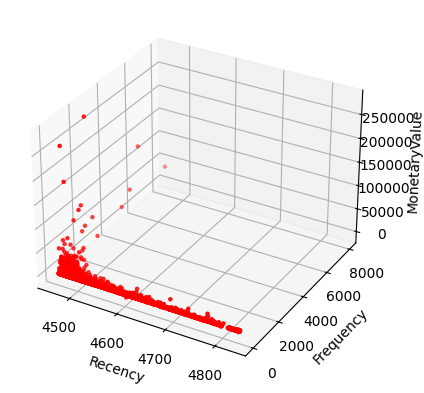

In [15]:
# Plot the table in a 3D scatter chart --> use ax = fig.add_subplot(111, projection='3d') and then ax.scatter
# For the moment we use a single color to plot all the points

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a new figure  
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the whole dataframe  
ax.scatter(rfm_table['Recency'], rfm_table['Frequency'], rfm_table['MonetaryValue'],   
           c='r', # this time we use a single color
           s=5)
 
# Set labels for axes  
ax.set_xlabel('Recency')  
ax.set_ylabel('Frequency')  
ax.set_zlabel('MonetaryValue') 
  
# Show the plot  
plt.show()  

# 6. Feature Scaling
Clustering algorithms such as K-means require the features to be on the same scale.

In [16]:
# hints: 
# - if "rfm_table" is the original table, the scaled version may be called "rfm_scaled"
# - use StandardScaler from sklearn.preprocessing 
# - with a single instruction "fit_transform" we can scale the whole dataset
# - after the transformation, check if the shape is the same as the dataframe that has un-scaled values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled= scaler.fit_transform(rfm_table)

print (f"rfm_scaled.shape: {rfm_scaled.shape}")

rfm_scaled

rfm_scaled.shape: (4372, 3)


array([[ 2.31528438, -0.3917197 , -0.23100099],
       [-0.89040738,  0.38265697,  0.29343167],
       [-0.16590119, -0.26695902, -0.01231622],
       ...,
       [-0.84078367, -0.34439668, -0.20951263],
       [-0.88048264,  2.85205812,  0.02390005],
       [-0.48349295, -0.0991774 , -0.00744423]])

# 7. Model Building
- First, we use the "elbow method" to decide how many clusters we should have.
- Then, we'll use K-means clustering to segment the customers.

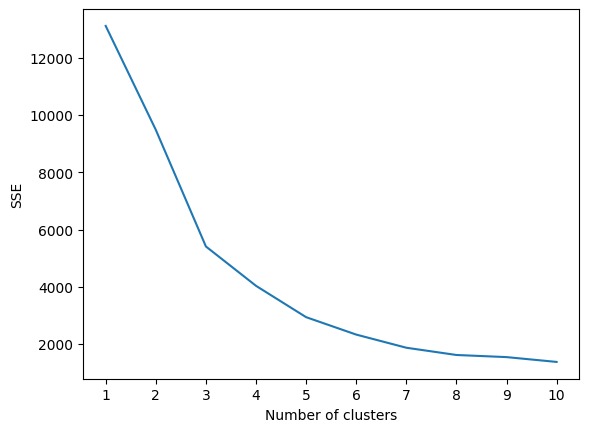

In [17]:
# Elbow method implementation, leveraging KMeans class from sklearn.cluster library
# the inertia_ attribute represents the sum of squared distances of samples to their closest cluster center:
# in other words, it's a measure of how internally coherent the clusters are. For example:
# KMeans(n_clusters=4).fit(rfm_scaled).inertia_ indicates the sum of squared distances of samples to their closest sample center

from sklearn.cluster import KMeans
  
# Determine the optimal number of clusters, e.g., using the elbow method
sse = {}

# calculate the inertia_ for multiple numbers of clusters, for ex. 11 clusters
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_

# Plot SSE for each cluster 
import matplotlib.pyplot as plt  
  
plt.figure()  
plt.plot(list(sse.keys()), list(sse.values()))  
plt.xlabel("Number of clusters")  
plt.ylabel("SSE")

# Set x-axis ticks to show every integer value  
plt.xticks(list(sse.keys()))

plt.show()

In [18]:
# After we decide the desired nr or clusters, we're ready for the training
# Run KMeans training again and appena the ".lables" column to the original rfm_table dataset

n_clusters = 3 # Suppose the elbow is at k=3

kmeans = KMeans(n_clusters=n_clusters, random_state=1)  
kmeans.fit(rfm_scaled)  
  
# Assign the cluster labels to the original RFM table  
rfm_table['Cluster'] = kmeans.labels_
rfm_table.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,4784,2,0.00,1
12347.0,4461,182,4310.00,0
12348.0,4534,31,1797.24,0
12349.0,4478,73,1757.55,0
12350.0,4769,17,334.40,1


# 8. Analyze the Results
Now we create another 3D scatter plot with your clustered data from the "rfm_table" dataset.<br/>
This time, you plot the data in 3D with the clusters represented by a dfferent color for each cluster.

In [ ]:
# Prepare your data:
# - Make sure your rfm_table dataset includes the following columns: 'Recency', 'Frequency', 'MonetaryValue', and 'Cluster'. 
# - The 'Cluster' column should contain the cluster labels (1, 2, 3...).

# Create a new figure, very similar to what you did earlier for the single-color 3d chart, but this time use multiple colors
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
  
# Define colors, you can choose any colors you like or use a colormap
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y'}
  
# Plot each cluster using a different color  
for cluster in rfm_table['Cluster'].unique():  
    # Filter data for each cluster  
    cluster_data = rfm_table[rfm_table['Cluster'] == cluster]  
    # Scatter plot for each cluster  
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['MonetaryValue'],   
               c=colors[cluster], label=f'Cluster {cluster}', s=5)
    
# Set labels for axes
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
  
# Legend
ax.legend()
  
# Show the plot
plt.show()